# Analyse de l'expérience de BinPacking

Par: Shawn Vosburg (voss2502)  
Date: 28 octobre 2021  
Cours: IFT 800 - Algorithmique (Université de Sherbrooke)  

Dans ce notebook, j'interprete les resultats obtenus durant l'exécution des algorithmes d'approximation de BinPacking que j'ai implémenté. 

### Importation des libraries & déclaration des variables globales

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# À changer pour une nouvel exécution du program
RESULTAT_PATH = "../resultats/resultats_save.csv"

### Importation des données et pré-traitement

In [2]:
df = pd.read_csv(RESULTAT_PATH)
df.head()

,AvgBin,GenerateurDonnees,M,MaxBin,MedianBin,MinBin,N,TimeElapsed(ns),VarBin,algo
0,0.905256,Aleatoire,102,0.999955,0.950704,0.588396,180,793956,0.010483,First Fit
1,0.747852,Aleatoire,117,0.994352,0.789142,0.123347,180,95965,0.035440,Next Fit
2,0.937560,Aleatoire,93,0.999833,0.972405,0.679783,180,1518396,0.007050,Best Fit
3,0.968193,Aleatoire,88,0.999995,0.995911,0.172313,180,1718429,0.009401,First Fit Decreasing
4,0.779017,Aleatoire,109,0.996369,0.801861,0.207122,180,137223,0.025827,Next Fit Decreasing


In [3]:
# Création d'un dictionnaire de couleurs pour les algorithmes
unique = df["algo"].unique()
palette = dict(zip(unique, sns.color_palette(n_colors=len(unique))))

## Génération des graphiques

### Temps écoulé

In [4]:
data = df.groupby(['algo','N'])['TimeElapsed(ns)'].mean().reset_index()
data.head()

,algo,N,TimeElapsed(ns)
0,Best Fit,180,2.420454e+06
1,Best Fit,360,8.810310e+06
2,Best Fit,720,2.772041e+07
3,Best Fit,1440,9.946496e+07
4,Best Fit,2880,4.408256e+08


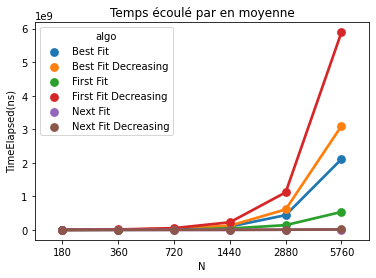

In [5]:
ax = sns.pointplot(data=data,x='N',y='TimeElapsed(ns)',hue='algo')
ax.set_title('Temps écoulé par en moyenne')
plt.show()

### Generation de données: Aléatoire

In [6]:
data_alea = df[df.GenerateurDonnees == 'Aleatoire']

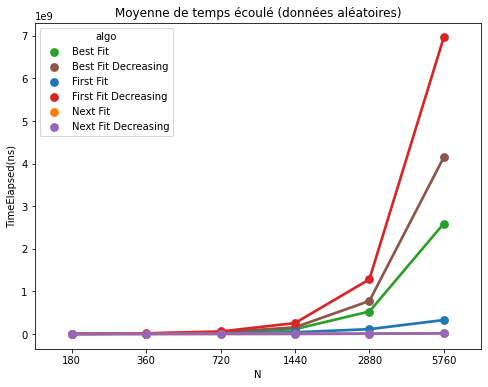

In [7]:
# Temps d'exécution moyen
data_temp = data_alea.groupby(['algo','N'])['TimeElapsed(ns)'].mean().reset_index()

fig = plt.figure(figsize=(8,6))

myplot = sns.pointplot(data=data_temp,x='N',y='TimeElapsed(ns)',hue='algo', palette=palette)

plt.title('Moyenne de temps écoulé (données aléatoires)')
plt.savefig('tempsexec_aleatoire.jpg', bbox_inches='tight')
plt.show()

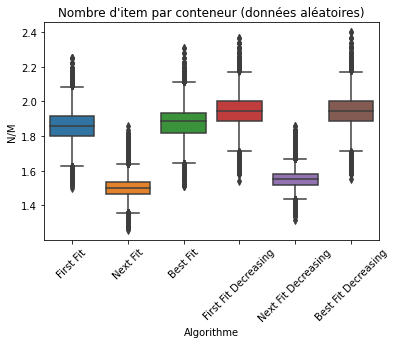

In [8]:
# Nombre de conteneurs, boxplot
data_temp = data_alea.copy()
data_temp['N/M'] = data_temp['N'] / data_temp['M']
data_temp = data_temp.rename(columns={'algo':'Algorithme'})

ax = sns.boxplot(data=data_temp,x='Algorithme',y='N/M',palette=palette)
ax.set_title("Nombre d'item par conteneur (données aléatoires)")

plt.xticks(rotation=45)
plt.savefig('itemparconteneur_aleatoire.jpg', bbox_inches='tight')
plt.show()

## FFWC

In [9]:
df_ffwc = df[df['GenerateurDonnees'] == 'FFWC'].copy()

# Selon le generateur que j'ai codé, OPT = N/3
df_ffwc['OPT'] = df_ffwc['N'] / 3

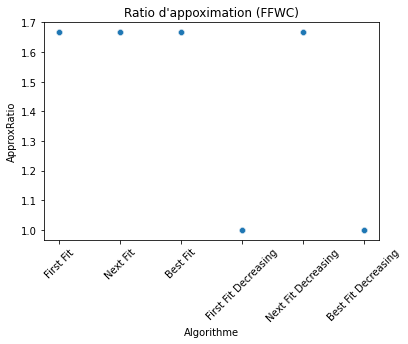

In [10]:
# Ratio d'approximation
data_temp = df_ffwc.copy()
data_temp['ApproxRatio'] = data_temp['M'] / data_temp['OPT']
data_temp = data_temp.rename(columns={'algo':'Algorithme'})

ax = sns.scatterplot(data=data_temp,x='Algorithme',y='ApproxRatio',palette=palette)
ax.set_title("Ratio d'appoximation (FFWC)")

plt.xticks(rotation=45)
plt.savefig('ratio_ffwc.jpg', bbox_inches='tight')
plt.show()

NFWC

In [11]:
df_nfwc = df[df['GenerateurDonnees'] == 'NFWC'].copy()

# Selon le generateur que j'ai codé, OPT = (N/4) + 1
df_nfwc['OPT'] = (df_nfwc['N'] / 4) + 1

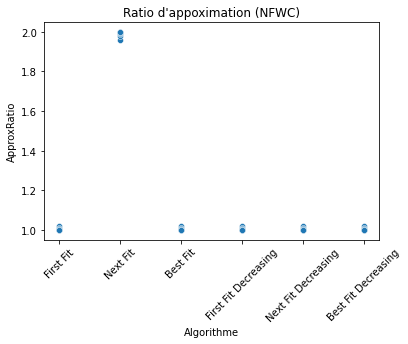

In [12]:
# Ratio d'approximation
data_temp = df_nfwc.copy()
data_temp['ApproxRatio'] = data_temp['M'] / data_temp['OPT']
data_temp = data_temp.rename(columns={'algo':'Algorithme'})

ax = sns.scatterplot(data=data_temp,x='Algorithme',y='ApproxRatio',palette=palette)
ax.set_title("Ratio d'appoximation (NFWC)")

plt.xticks(rotation=45)
plt.savefig('ratio_nfwc.jpg', bbox_inches='tight')
plt.show()

## FFDWC

In [13]:
df_ffdwc = df[df['GenerateurDonnees'] == 'FFDWC'].copy()

# Selon le generateur que j'ai codé, OPT = (3*n)/10
df_ffdwc['OPT'] = (3 * df_ffdwc['N'] / 10)

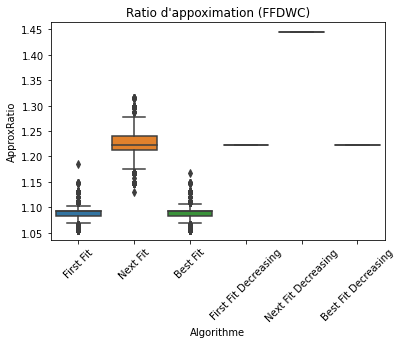

In [14]:
# Ratio d'approximation
data_temp = df_ffdwc.copy()
data_temp['ApproxRatio'] = data_temp['M'] / data_temp['OPT']
data_temp = data_temp.rename(columns={'algo':'Algorithme'})

ax = sns.boxplot(data=data_temp,x='Algorithme',y='ApproxRatio',palette=palette)
ax.set_title("Ratio d'appoximation (FFDWC)")

plt.xticks(rotation=45)
plt.savefig('ratio_ffdwc.jpg', bbox_inches='tight')
plt.show()

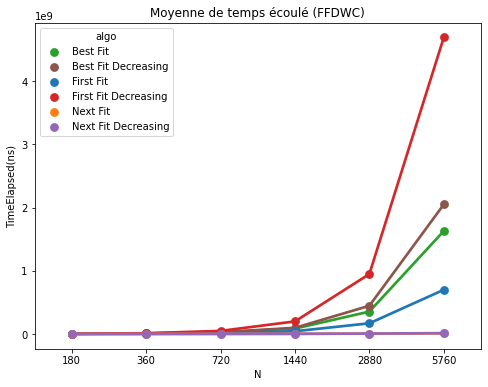

In [15]:
# Temps d'exécution moyen
data_temp = df_ffdwc.groupby(['algo','N'])['TimeElapsed(ns)'].mean().reset_index()

fig = plt.figure(figsize=(8,6))

myplot = sns.pointplot(data=data_temp,x='N',y='TimeElapsed(ns)',hue='algo', palette=palette)

plt.title('Moyenne de temps écoulé (FFDWC)')
plt.savefig('tempsexec_ffdwc.jpg', bbox_inches='tight')
plt.show()